In [1]:
import numpy as np
import glob
import xarray as xr
import pandas as pd
import time, datetime, calendar, pytz
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [2]:
years = ['2011','2012']

# rootdir = '/global/project/projectdirs/m1657/zfeng/usa/'
# obsfiles = []
# wrf1files = []
# wrf2files = []
# for iy in years:
#     obsfiles.extend(sorted(glob.glob(f'{rootdir}nmq/stats/monthly/mcs_rainhov_{iy}??.nc')))
#     wrf1files.extend(sorted(glob.glob(f'{rootdir}wrf/wrf381_control_{iy}/statstb/monthly/mcs_rainhov_{iy}??.nc')))
#     wrf2files.extend(sorted(glob.glob(f'{rootdir}wrf/wrf381_irrig_{iy}/statstb/monthly/mcs_rainhov_{iy}??.nc')))

datadir = '/project/projectdirs/m1660/www/yang560/IRI_MCS/fig2/'
obsfiles = sorted(glob.glob(f'{datadir}nmq_mcs_rainhov_20??.nc'))
wrf1files = sorted(glob.glob(f'{datadir}wrf_control_mcs_rainhov_20??.nc'))
wrf2files = sorted(glob.glob(f'{datadir}wrf_irrig_mcs_rainhov_20??.nc'))

mapfile = f'{datadir}wrf_irrig_grid.nc'
    
startlon = -110
endlon = -80

print(f'Number of OBS files: {len(obsfiles)}')
print(f'Number of WRF CTL files: {len(wrf1files)}')
print(f'Number of WRF IRI files: {len(wrf2files)}')

# figdir = '/global/project/projectdirs/m1657/zfeng/usa/wrf/figures4paper/'
figdir = datadir

Number of OBS files: 2
Number of WRF CTL files: 2
Number of WRF IRI files: 2


In [3]:
obsfiles, wrf1files, wrf2files

(['/project/projectdirs/m1660/www/yang560/IRI_MCS/fig2/nmq_mcs_rainhov_2011.nc',
  '/project/projectdirs/m1660/www/yang560/IRI_MCS/fig2/nmq_mcs_rainhov_2012.nc'],
 ['/project/projectdirs/m1660/www/yang560/IRI_MCS/fig2/wrf_control_mcs_rainhov_2011.nc',
  '/project/projectdirs/m1660/www/yang560/IRI_MCS/fig2/wrf_control_mcs_rainhov_2012.nc'],
 ['/project/projectdirs/m1660/www/yang560/IRI_MCS/fig2/wrf_irrig_mcs_rainhov_2011.nc',
  '/project/projectdirs/m1660/www/yang560/IRI_MCS/fig2/wrf_irrig_mcs_rainhov_2012.nc'])

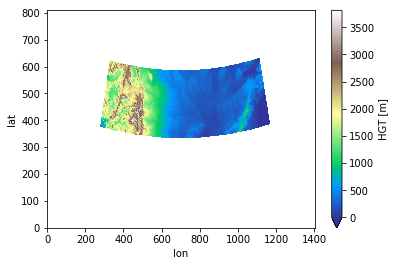

In [4]:
# Read terrain height file
dsmap = xr.open_dataset(mapfile)
# Central US box
lonbox = [-115,-75]
latbox = [36,45]
# Check subset region
dsmap.HGT.where((dsmap.longitude >= lonbox[0]) & (dsmap.longitude <= lonbox[1]) & 
                (dsmap.latitude >= latbox[0]) & (dsmap.latitude <= latbox[1])).plot(vmin=0, cmap='terrain')

In [5]:
# Average terrain height over latitude band
hgt_avg = dsmap.HGT.where((dsmap.longitude >= lonbox[0]) & (dsmap.longitude <= lonbox[1]) & 
                            (dsmap.latitude >= latbox[0]) & (dsmap.latitude <= latbox[1]), drop=True).mean(dim='lat') / 1000.
lon_hgt = dsmap.longitude.where((dsmap.longitude >= lonbox[0]) & (dsmap.longitude <= lonbox[1]) & 
                                (dsmap.latitude >= latbox[0]) & (dsmap.latitude <= latbox[1]), drop=True).mean(dim='lat')

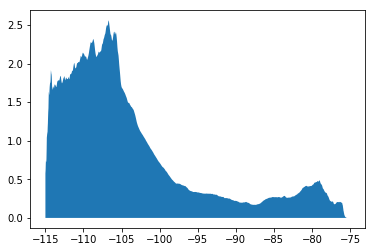

In [6]:
plt.fill_between(lon_hgt, 0, hgt_avg)

In [7]:
dsobs = xr.open_mfdataset(obsfiles, concat_dim='time', combine='nested')
dsobs

<xarray.Dataset>
Dimensions:            (lon: 1100, time: 10230)
Coordinates:
  * lon                (lon) float32 -109.98989 -109.953514 ... -70.0101
  * time               (time) datetime64[ns] 2011-04-01 ... 2012-10-31T23:00:00
Data variables:
    precipitation      (time, lon) float32 dask.array<chunksize=(5119, 1100), meta=np.ndarray>
    mcs_precipitation  (time, lon) float32 dask.array<chunksize=(5119, 1100), meta=np.ndarray>
    mcs_areafrac       (time, lon) float32 dask.array<chunksize=(5119, 1100), meta=np.ndarray>
Attributes:
    title:       MCS precipitation Hovmoller
    startlat:    36.0
    endlat:      45.0
    startlon:    -110.0
    endlon:      -70.0
    contact:     Zhe Feng, zhe.feng@pnnl.gov
    created_on:  Tue Apr  2 23:19:09 2019
    history:     Tue Apr  7 09:08:43 2020: ncrcat mcs_rainhov_201104.nc mcs_r...
    NCO:         netCDF Operators version 4.7.9 (Homepage = http://nco.sf.net...

In [8]:
dswrf1 = xr.open_mfdataset(wrf1files, concat_dim='time', combine='nested')
dswrf1

<xarray.Dataset>
Dimensions:            (lon: 1404, time: 10270)
Coordinates:
  * lon                (lon) float32 -130.24529 -130.2007 ... -61.754684
  * time               (time) datetime64[ns] 2011-04-01T01:00:00 ... 2012-10-31T23:00:00
Data variables:
    precipitation      (time, lon) float32 dask.array<chunksize=(5135, 1404), meta=np.ndarray>
    mcs_precipitation  (time, lon) float32 dask.array<chunksize=(5135, 1404), meta=np.ndarray>
    mcs_areafrac       (time, lon) float32 dask.array<chunksize=(5135, 1404), meta=np.ndarray>
Attributes:
    title:       MCS precipitation Hovmoller
    startlat:    36.0
    endlat:      45.0
    contact:     Zhe Feng, zhe.feng@pnnl.gov
    created_on:  Wed Apr  3 00:48:34 2019
    history:     Tue Apr  7 09:10:16 2020: ncrcat mcs_rainhov_201104.nc mcs_r...
    NCO:         netCDF Operators version 4.7.9 (Homepage = http://nco.sf.net...

In [9]:
dswrf2 = xr.open_mfdataset(wrf2files, concat_dim='time', combine='nested')
dswrf2

<xarray.Dataset>
Dimensions:            (lon: 1404, time: 10270)
Coordinates:
  * lon                (lon) float32 -130.24529 -130.2007 ... -61.754684
  * time               (time) datetime64[ns] 2011-04-01T01:00:00 ... 2012-10-31T23:00:00
Data variables:
    precipitation      (time, lon) float32 dask.array<chunksize=(5135, 1404), meta=np.ndarray>
    mcs_precipitation  (time, lon) float32 dask.array<chunksize=(5135, 1404), meta=np.ndarray>
    mcs_areafrac       (time, lon) float32 dask.array<chunksize=(5135, 1404), meta=np.ndarray>
Attributes:
    title:       MCS precipitation Hovmoller
    startlat:    36.0
    endlat:      45.0
    contact:     Zhe Feng, zhe.feng@pnnl.gov
    created_on:  Mon Nov  5 18:57:46 2018
    history:     Tue Apr  7 09:12:08 2020: ncrcat mcs_rainhov_201104.nc mcs_r...
    NCO:         netCDF Operators version 4.7.9 (Homepage = http://nco.sf.net...

In [10]:
years_obs = dsobs.time.dt.year
years_wrf1 = dswrf1.time.dt.year
years_wrf2 = dswrf2.time.dt.year
months_obs = dsobs.time.dt.month
months_wrf1 = dswrf1.time.dt.month
months_wrf2 = dswrf2.time.dt.month

In [11]:
mcspcphovdiur_jja2011_obs = dsobs.mcs_precipitation.sel(lon=slice(startlon, endlon)).where((years_obs == 2011) & (months_obs >= 6) & (months_obs <= 8)).groupby('time.hour').mean(dim='time')
mcspcphovdiur_jja2012_obs = dsobs.mcs_precipitation.sel(lon=slice(startlon, endlon)).where((years_obs == 2012) & (months_obs >= 6) & (months_obs <= 8)).groupby('time.hour').mean(dim='time')
lon_obs = dsobs.lon.sel(lon=slice(startlon, endlon))

In [12]:
mcspcphovdiur_jja2011_wrf1 = dswrf1.mcs_precipitation.sel(lon=slice(startlon, endlon)).where((years_wrf1 == 2011) & (months_wrf1 >= 6) & (months_wrf1 <= 8)).groupby('time.hour').mean(dim='time')
mcspcphovdiur_jja2012_wrf1 = dswrf1.mcs_precipitation.sel(lon=slice(startlon, endlon)).where((years_wrf1 == 2012) & (months_wrf1 >= 6) & (months_wrf1 <= 8)).groupby('time.hour').mean(dim='time')
lon_wrf = dswrf1.lon.sel(lon=slice(startlon, endlon))

In [13]:
mcspcphovdiur_jja2011_wrf2 = dswrf2.mcs_precipitation.sel(lon=slice(startlon, endlon)).where((years_wrf2 == 2011) & (months_wrf2 >= 6) & (months_wrf2 <= 8)).groupby('time.hour').mean(dim='time')
mcspcphovdiur_jja2012_wrf2 = dswrf2.mcs_precipitation.sel(lon=slice(startlon, endlon)).where((years_wrf2 == 2012) & (months_wrf2 >= 6) & (months_wrf2 <= 8)).groupby('time.hour').mean(dim='time')

In [14]:
# Calculate difference
mcspcpdiff_jja2011_wrf21 = mcspcphovdiur_jja2011_wrf2 - mcspcphovdiur_jja2011_wrf1
mcspcpdiff_jja2012_wrf21 = mcspcphovdiur_jja2012_wrf2 - mcspcphovdiur_jja2012_wrf1

# Calculate percentage difference
mcspcphovdiur_jja2011_wrf21_percent = 100 * (mcspcphovdiur_jja2011_wrf2 - mcspcphovdiur_jja2011_wrf1) / mcspcphovdiur_jja2011_wrf1
mcspcphovdiur_jja2012_wrf21_percent = 100 * (mcspcphovdiur_jja2012_wrf2 - mcspcphovdiur_jja2012_wrf1) / mcspcphovdiur_jja2012_wrf1

In [15]:
# Extend 1 hour at the end of the day and copy the 1st hour values to make a nicer 24 h length
mcspcphovdiur_jja2011_obs_lt = np.roll(mcspcphovdiur_jja2011_obs, 6, axis=0)
mcspcphovdiur_jja2011_obsE = np.ndarray((25, mcspcphovdiur_jja2011_obs_lt.shape[1]))
mcspcphovdiur_jja2011_obsE[0:24,:] = mcspcphovdiur_jja2011_obs_lt
mcspcphovdiur_jja2011_obsE[24,:] = mcspcphovdiur_jja2011_obs_lt[0,:]

mcspcphovdiur_jja2012_obs_lt = np.roll(mcspcphovdiur_jja2012_obs, 6, axis=0)
mcspcphovdiur_jja2012_obsE = np.ndarray((25, mcspcphovdiur_jja2012_obs_lt.shape[1]))
mcspcphovdiur_jja2012_obsE[0:24,:] = mcspcphovdiur_jja2012_obs_lt
mcspcphovdiur_jja2012_obsE[24,:] = mcspcphovdiur_jja2012_obs_lt[0,:]

In [16]:
# Extend 1 hour at the end of the day and copy the 1st hour values to make a nicer 24 h length
mcspcphovdiur_jja2011_wrf1_lt = np.roll(mcspcphovdiur_jja2011_wrf1, 6, axis=0)
mcspcphovdiur_jja2011_wrf1E = np.ndarray((25, mcspcphovdiur_jja2011_wrf1_lt.shape[1]))
mcspcphovdiur_jja2011_wrf1E[0:24,:] = mcspcphovdiur_jja2011_wrf1_lt
mcspcphovdiur_jja2011_wrf1E[24,:] = mcspcphovdiur_jja2011_wrf1_lt[0,:]

mcspcphovdiur_jja2012_wrf1_lt = np.roll(mcspcphovdiur_jja2012_wrf1, 6, axis=0)
mcspcphovdiur_jja2012_wrf1E = np.ndarray((25, mcspcphovdiur_jja2012_wrf1_lt.shape[1]))
mcspcphovdiur_jja2012_wrf1E[0:24,:] = mcspcphovdiur_jja2012_wrf1_lt
mcspcphovdiur_jja2012_wrf1E[24,:] = mcspcphovdiur_jja2012_wrf1_lt[0,:]

In [17]:
# Extend 1 hour at the end of the day and copy the 1st hour values to make a nicer 24 h length
mcspcphovdiur_jja2011_wrf2_lt = np.roll(mcspcphovdiur_jja2011_wrf2, 6, axis=0)
mcspcphovdiur_jja2011_wrf2E = np.ndarray((25, mcspcphovdiur_jja2011_wrf2_lt.shape[1]))
mcspcphovdiur_jja2011_wrf2E[0:24,:] = mcspcphovdiur_jja2011_wrf2_lt
mcspcphovdiur_jja2011_wrf2E[24,:] = mcspcphovdiur_jja2011_wrf2_lt[0,:]

mcspcphovdiur_jja2012_wrf2_lt = np.roll(mcspcphovdiur_jja2012_wrf2, 6, axis=0)
mcspcphovdiur_jja2012_wrf2E = np.ndarray((25, mcspcphovdiur_jja2012_wrf2_lt.shape[1]))
mcspcphovdiur_jja2012_wrf2E[0:24,:] = mcspcphovdiur_jja2012_wrf2_lt
mcspcphovdiur_jja2012_wrf2E[24,:] = mcspcphovdiur_jja2012_wrf2_lt[0,:]

In [18]:
# MCS precipitation difference amount
mcspcpdiff_jja2011_wrf21_lt = np.roll(mcspcpdiff_jja2011_wrf21, 6, axis=0)
mcspcpdiff_jja2011_wrf21E = np.ndarray((25, mcspcpdiff_jja2011_wrf21.shape[1]))
mcspcpdiff_jja2011_wrf21E[0:24,:] = mcspcpdiff_jja2011_wrf21_lt
mcspcpdiff_jja2011_wrf21E[24,:] = mcspcpdiff_jja2011_wrf21_lt[0,:]

mcspcpdiff_jja2012_wrf21_lt = np.roll(mcspcpdiff_jja2012_wrf21, 6, axis=0)
mcspcpdiff_jja2012_wrf21E = np.ndarray((25, mcspcpdiff_jja2012_wrf21.shape[1]))
mcspcpdiff_jja2012_wrf21E[0:24,:] = mcspcpdiff_jja2012_wrf21_lt
mcspcpdiff_jja2012_wrf21E[24,:] = mcspcpdiff_jja2012_wrf21_lt[0,:]

# MCS precipitation difference percentage
mcspcphovdiur_jja2011_wrf21_percent_lt = np.roll(mcspcphovdiur_jja2011_wrf21_percent, 6, axis=0)
mcspcphovdiur_jja2011_wrf21_percentE = np.ndarray((25, mcspcphovdiur_jja2011_wrf21_percent.shape[1]))
mcspcphovdiur_jja2011_wrf21_percentE[0:24,:] = mcspcphovdiur_jja2011_wrf21_percent_lt
mcspcphovdiur_jja2011_wrf21_percentE[24,:] = mcspcphovdiur_jja2011_wrf21_percent_lt[0,:]

mcspcphovdiur_jja2012_wrf21_percent_lt = np.roll(mcspcphovdiur_jja2012_wrf21_percent, 6, axis=0)
mcspcphovdiur_jja2012_wrf21_percentE = np.ndarray((25, mcspcphovdiur_jja2012_wrf21_percent.shape[1]))
mcspcphovdiur_jja2012_wrf21_percentE[0:24,:] = mcspcphovdiur_jja2012_wrf21_percent_lt
mcspcphovdiur_jja2012_wrf21_percentE[24,:] = mcspcphovdiur_jja2012_wrf21_percent_lt[0,:]

/global/homes/f/feng045/envs/py37/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*args2)
/global/homes/f/feng045/envs/py37/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)


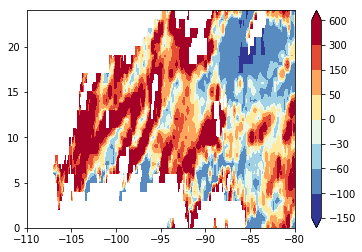

In [19]:
hour = np.arange(0, 25, 1)
levels = [-150,-100,-60,-30,0,50,150,300,600]
# levels = np.arange(-400,401,100)
# Zm = np.ma.masked_where(np.isnan(mcspcphovdiur_jja_wrf21_percentE), mcspcphovdiur_jja_wrf21_percentE)
Zm = np.ma.masked_where(mcspcphovdiur_jja2012_wrf1E < 0.001, mcspcphovdiur_jja2012_wrf21_percentE)
cmap = plt.get_cmap('RdYlBu_r')
norm = mpl.colors.BoundaryNorm(levels, cmap.N)
plt.contourf(lon_wrf, hour, Zm, levels=levels, norm=norm, cmap=cmap, extend='both')
plt.colorbar()

# Plot Hovmoller MCS rain, difference

In [20]:
def plot_hov_diff(dataarr, lonarr, hour, levels, cmaps, titles, cblabels, midnightcolors, gpcolors, figname):

    mpl.rcParams['font.size'] = 18
    mpl.rcParams['font.family'] = 'Helvetica'

    timeval = np.arange(0, 24.1, 6)
    timename = ('12PM', '6PM', '12AM', '6AM', '12PM')
#     midnightcolors = ['w','w','k','w','w','k']
#     gpcolors = ['w','w','k','w','w','k']
#     midnightcolors = ['w','w','w','w','w','w']
#     gpcolors = ['w','w','w','w','w','w']
    xlabels = ['','','','Longitude','Longitude','Longitude']
    ylabels = ['','','Terrain (km)','','','Terrain (km)']
    tercolor = 'tomato'
    xlim = (-110, -80)

    fig = plt.figure(figsize=[20,12], dpi=100)
    gs = gridspec.GridSpec(3,3, height_ratios=[1,1,0.05], width_ratios=[1,1,1])
    gs.update(left=0.05, right=0.95, wspace=0.25, hspace=0.3)

    ax_save = []
    panels = np.arange(0,6,1)
    for i, pp in enumerate(panels):
        pp = panels[i]
        ax = plt.subplot(gs[pp])
        cmap = plt.get_cmap(cmaps[i])
        norm = mpl.colors.BoundaryNorm(levels[i], cmap.N)
        cf1 = ax.contourf(lonarr[i], hour, dataarr[i], levels=levels[i], norm=norm, cmap=cmap, extend='both')
        ax.set_xlim(xlim)
        ax.set_yticks(timeval)
        ax.set_yticklabels(timename)
        ax.axhline(y=12, ls='--', color=midnightcolors[i], lw=2)
        ax.set_xlabel(xlabels[i])
        ax.set_title(titles[pp], loc='left')
        # Hide ylabels except for the left most 2 panels
#         if (i != 0) & (i != 3):
#             ax.axes.yaxis.set_ticklabels([])

        # Draw an arrow to show the direction of time increase
        if (pp == 0) | (pp == 3):
            ax.annotate('', xy=(-0.2, 1), xycoords='axes fraction', xytext=(-0.2, 0), 
                        arrowprops=dict(facecolor='k', width=2))
        # Annotate Foothill
    #         if (pp == 0) | (pp == 4):
    #     ax.annotate('Foothill', xy=(-104, 6.2), xycoords='data', xytext=(-98, 2), color=gpcolors[pp], 
    #                 horizontalalignment='left', verticalalignment='bottom', fontsize=20, 
        ax.annotate('Foothill', xy=(-104, 5.8), xycoords='data', xytext=(-104, 0.5), color=gpcolors[pp], 
                    horizontalalignment='center', verticalalignment='bottom', fontsize=20, 
                    arrowprops=dict(width=1.5, color=gpcolors[pp], lw=1), zorder=5)
        # Annotate Great Plains
        ax.axvline(x=-105, color=gpcolors[pp], ls=':', lw=1.5)
        ax.axvline(x=-83, color=gpcolors[pp], ls=':', lw=1.5)
        ax.text(-95, 21, 'Central US', color=gpcolors[pp], fontsize=20, ha='center', clip_on=True, weight='bold')

        # Terrain height twinx
        ax2 = ax.twinx()
        p2 = ax2.plot(lon_hgt, hgt_avg, color=tercolor, lw=3)
        ax2.yaxis.label.set_color(tercolor)
        ax2.set_ylabel(ylabels[i])
        tkw = dict(size=5, width=1.5)
        ax2.tick_params(axis='y', colors=tercolor, **tkw)
        ax2.set_ylim(0, 5)

        # Colorbar
        if (i >= 3):
            cax1 = plt.subplot(gs[2,i-3])
            cb1 = plt.colorbar(cf1, cax=cax1, label=cblabels[i], orientation='horizontal')

    fig.savefig(figname, dpi=300, bbox_inches='tight')
    return fig

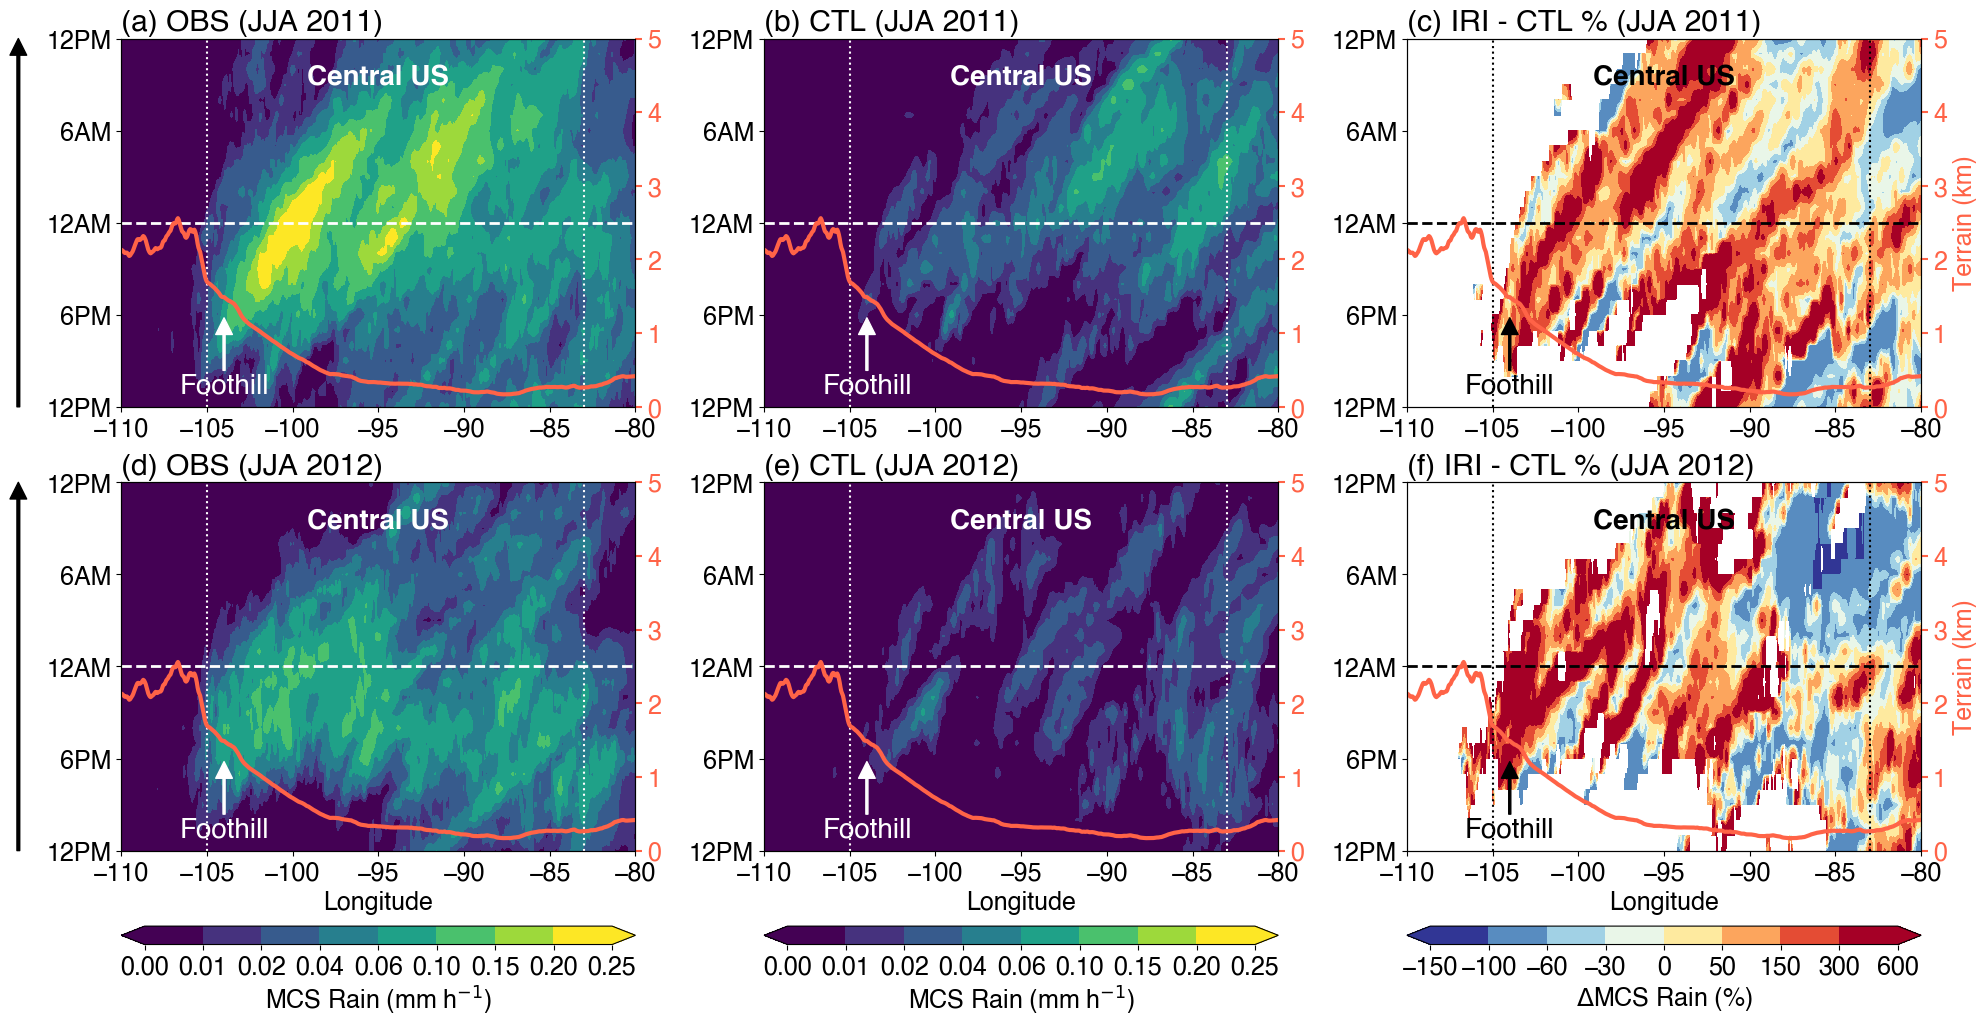

In [25]:
lonarr = [lon_obs, lon_wrf, lon_wrf, lon_obs, lon_wrf, lon_wrf]
hour = np.arange(0, 25, 1)
Zm11 = np.ma.masked_where(mcspcphovdiur_jja2011_wrf1E < 0.001, mcspcphovdiur_jja2011_wrf21_percentE)
Zm12 = np.ma.masked_where(mcspcphovdiur_jja2012_wrf1E < 0.001, mcspcphovdiur_jja2012_wrf21_percentE)
dataarr = [mcspcphovdiur_jja2011_obsE, mcspcphovdiur_jja2011_wrf1E, Zm11, 
           mcspcphovdiur_jja2012_obsE, mcspcphovdiur_jja2012_wrf1E, Zm12,]
# levpcp = np.arange(0,0.201,0.02)
levpcp = [0,0.01,0.02,0.04,0.06,0.10,0.15,0.20,0.25]
levper = [-150,-100,-60,-30,0,50,150,300,600]
levels = [levpcp, levpcp, levper, levpcp, levpcp, levper]
cmaps = ['viridis','viridis','RdYlBu_r', 'viridis','viridis','RdYlBu_r']
titles = [f'(a) OBS (JJA 2011)', f'(b) CTL (JJA 2011)', f'(c) IRI - CTL % (JJA 2011)', 
          f'(d) OBS (JJA 2012)', f'(e) CTL (JJA 2012)', f'(f) IRI - CTL % (JJA 2012)']
cblabels = ['MCS Rain (mm h$^{-1}$)','MCS Rain (mm h$^{-1}$)','$\Delta$MCS Rain (%)',
            'MCS Rain (mm h$^{-1}$)','MCS Rain (mm h$^{-1}$)','$\Delta$MCS Rain (%)']
midnightcolors = ['w','w','k','w','w','k']
gpcolors = ['w','w','k','w','w','k']
# figname = f'{figdir}obs_wrfdiffpercent_mcs_rainhov_diurnal_2011-2012jja.png'
figname = f'{figdir}obs_wrfdiffpercent_mcs_rainhov_diurnal_2011-2012jja.pdf'
fig = plot_hov_diff(dataarr, lonarr, hour, levels, cmaps, titles, cblabels, midnightcolors, gpcolors, figname)

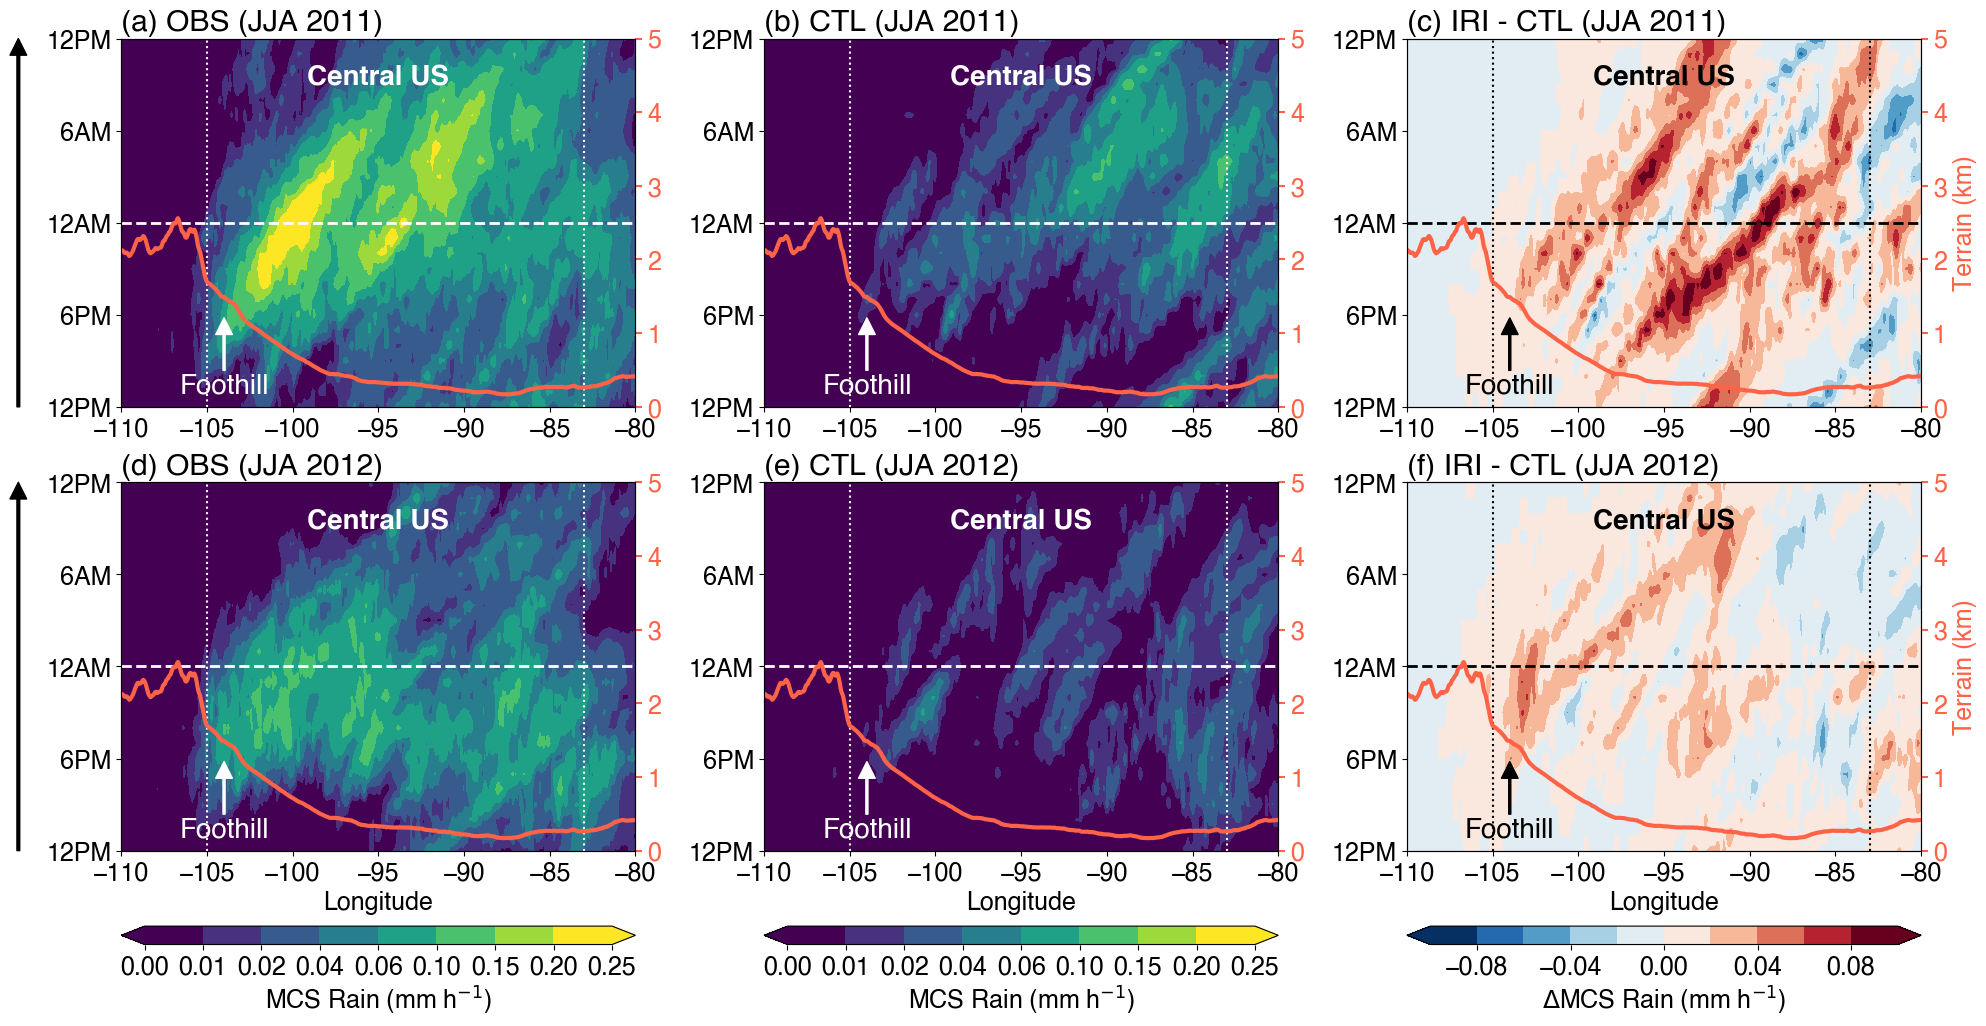

In [22]:
lonarr = [lon_obs, lon_wrf, lon_wrf, lon_obs, lon_wrf, lon_wrf]
hour = np.arange(0, 25, 1)
dataarr = [mcspcphovdiur_jja2011_obsE, mcspcphovdiur_jja2011_wrf1E, mcspcpdiff_jja2011_wrf21E, 
           mcspcphovdiur_jja2012_obsE, mcspcphovdiur_jja2012_wrf1E, mcspcpdiff_jja2012_wrf21E,]
# levpcp = np.arange(0,0.201,0.02)
levpcp = [0,0.01,0.02,0.04,0.06,0.10,0.15,0.20,0.25]
levper = np.arange(-0.1,0.11,0.02)
levels = [levpcp, levpcp, levper, levpcp, levpcp, levper]
cmaps = ['viridis','viridis','RdBu_r', 'viridis','viridis','RdBu_r']
titles = [f'(a) OBS (JJA 2011)', f'(b) CTL (JJA 2011)', f'(c) IRI - CTL (JJA 2011)', 
          f'(d) OBS (JJA 2012)', f'(e) CTL (JJA 2012)', f'(f) IRI - CTL (JJA 2012)']
cblabels = ['MCS Rain (mm h$^{-1}$)','MCS Rain (mm h$^{-1}$)','$\Delta$MCS Rain (mm h$^{-1}$)',
            'MCS Rain (mm h$^{-1}$)','MCS Rain (mm h$^{-1}$)','$\Delta$MCS Rain (mm h$^{-1}$)']
midnightcolors = ['w','w','k','w','w','k']
gpcolors = ['w','w','k','w','w','k']
figname = f'{figdir}obs_wrfdiff_mcs_rainhov_diurnal_2011-2012jja.png'
fig = plot_hov_diff(dataarr, lonarr, hour, levels, cmaps, titles, cblabels, midnightcolors, gpcolors, figname)

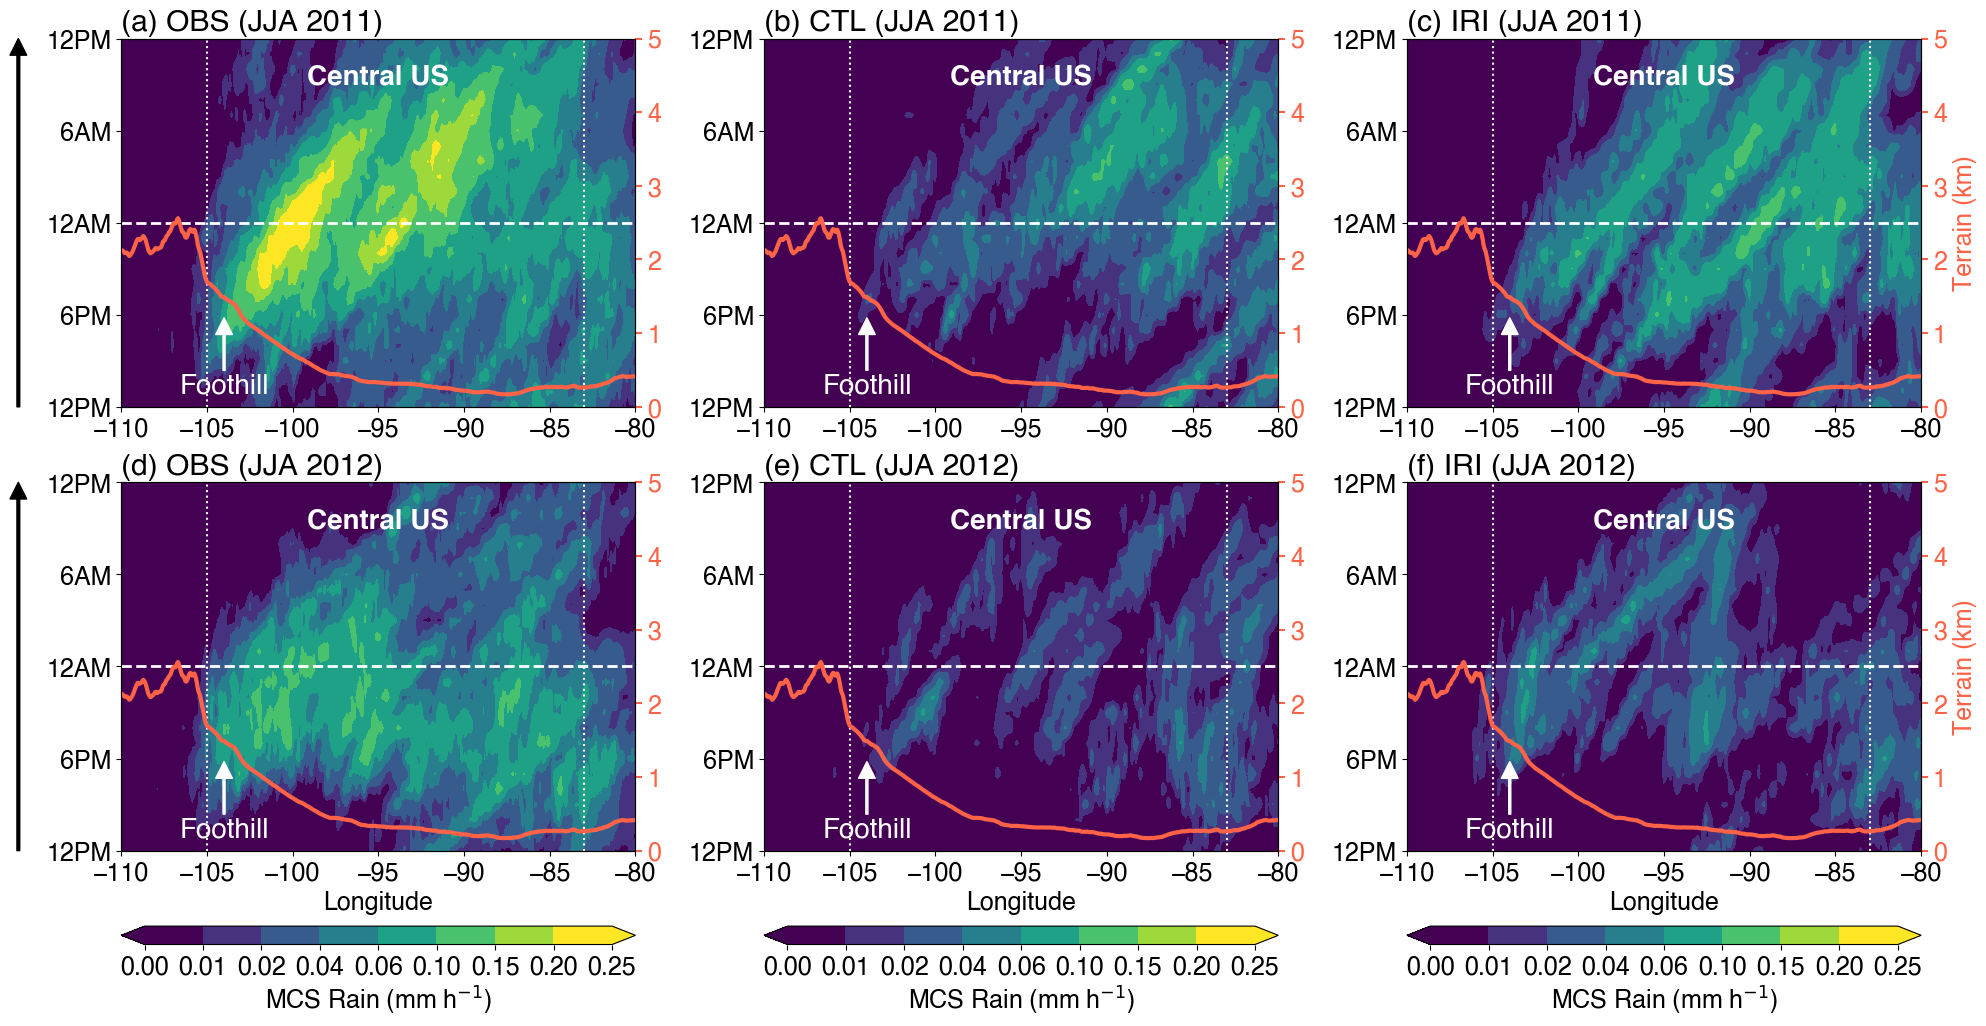

In [23]:
lonarr = [lon_obs, lon_wrf, lon_wrf, lon_obs, lon_wrf, lon_wrf]
hour = np.arange(0, 25, 1)
dataarr = [mcspcphovdiur_jja2011_obsE, mcspcphovdiur_jja2011_wrf1E, mcspcphovdiur_jja2011_wrf2E, 
           mcspcphovdiur_jja2012_obsE, mcspcphovdiur_jja2012_wrf1E, mcspcphovdiur_jja2012_wrf2E,]
levpcp = [0,0.01,0.02,0.04,0.06,0.10,0.15,0.20,0.25]
levels = [levpcp, levpcp, levpcp, levpcp, levpcp, levpcp]
cmaps = ['viridis','viridis','viridis', 'viridis','viridis','viridis']
titles = [f'(a) OBS (JJA 2011)', f'(b) CTL (JJA 2011)', f'(c) IRI (JJA 2011)', 
          f'(d) OBS (JJA 2012)', f'(e) CTL (JJA 2012)', f'(f) IRI (JJA 2012)']
cblabels = ['MCS Rain (mm h$^{-1}$)','MCS Rain (mm h$^{-1}$)','MCS Rain (mm h$^{-1}$)',
            'MCS Rain (mm h$^{-1}$)','MCS Rain (mm h$^{-1}$)','MCS Rain (mm h$^{-1}$)']
midnightcolors = ['w','w','w','w','w','w']
gpcolors = ['w','w','w','w','w','w']
figname = f'{figdir}obs_wrf_mcs_rainhov_diurnal_2011-2012jja.png'
fig = plot_hov_diff(dataarr, lonarr, hour, levels, cmaps, titles, cblabels, midnightcolors, gpcolors, figname)

In [24]:
figdir

'/project/projectdirs/m1660/www/yang560/IRI_MCS/fig2/'